## Operation

In [15]:
class Operation():
    
    def __init__(self,input_nodes=[]):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)    
            
    def Compute(self):
        pass

In [114]:
class add(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
    def compute(self, x_var,y_var):
        self.inputs =[x_var,y_var]
        return x_var + y_var

In [115]:
class multiply(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
    def compute(self, x_var,y_var):
        self.inputs =[x_var,y_var]
        return x_var * y_var

In [116]:
class matmul(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
    def compute(self, x_var,y_var):
        self.inputs =[x_var,y_var]
        return x_var.dot(y_var) 

## Variables, placeholders and graphs.

In [117]:
class Placeholder():
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [118]:
class Variable():
    def __init__(self, initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [119]:
class Graph():
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

z = Ax + b

A = 10

b = 1

z = 10x + 1

In [120]:
g = Graph()

In [121]:
g.set_as_default()

In [122]:
A = Variable(10)

In [123]:
b = Variable(1)

In [124]:
x = Placeholder()

In [125]:
y = multiply(A,x)

In [126]:
z = add(y,b)

In [127]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [128]:
class Session:
    
    def run(self, operation, feed_dict = {}):
        """ 
          operation: The operation to compute
          feed_dict: Dictionary mapping placeholders to input values (the data)  
        """
        
        # Puts nodes in correct order
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:

            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else: # Operation
                
                node.inputs = [input_node.output for input_node in node.input_nodes]

                 
                node.output = node.compute(*node.inputs)
                
            # Convert lists to numpy arrays
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        # Return the requested node value
        return operation.output



In [129]:
sess = Session()

In [130]:
result = sess.run(operation=z,feed_dict={x:10})

In [131]:
result

101

In [132]:
g = Graph()

g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,1])

x = Placeholder()

y = matmul(A,x)

z = add(y,b)

In [133]:
sess = Session()

In [134]:
import numpy as np

In [135]:
result = sess.run(operation=z,feed_dict={x:10})

In [136]:
result

array([[101, 201],
       [301, 401]])

## Classification

Activation function

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [139]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

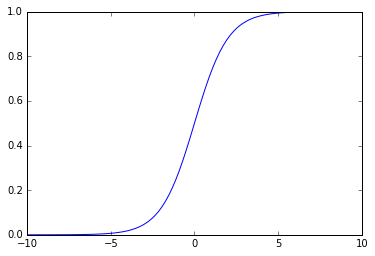

In [140]:
plt.plot(sample_z,sample_a)

In [141]:
class Sigmoid(Operation):
    def __init__(self,z):
        super().__init__([z])
    def compute(self,z_val):
        return 1/(1 + np.exp(-z_val))

In [142]:
from sklearn.datasets import make_blobs

In [143]:
data = make_blobs(n_samples=50, n_features=2, centers=2, random_state=75)

In [144]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [145]:
type(data)

tuple

In [146]:
data[0]   #features


array([[  7.3402781 ,   9.36149154],
       [  9.13332743,   8.74906102],
       [  1.99243535,  -8.85885722],
       [  7.38443759,   7.72520389],
       [  7.97613887,   8.80878209],
       [  7.76974352,   9.50899462],
       [  8.3186688 ,  10.1026025 ],
       [  8.79588546,   7.28046702],
       [  9.81270381,   9.46968531],
       [  1.57961049,  -8.17089971],
       [  0.06441546,  -9.04982817],
       [  7.2075117 ,   7.04533624],
       [  9.10704928,   9.0272212 ],
       [  1.82921897,  -9.86956281],
       [  7.85036314,   7.986659  ],
       [  3.04605603,  -7.50486114],
       [  1.85582689,  -6.74473432],
       [  2.88603902,  -8.85261704],
       [ -1.20046211,  -9.55928542],
       [  2.00890845,  -9.78471782],
       [  7.68945113,   9.01706723],
       [  6.42356167,   8.33356412],
       [  8.15467319,   7.87489634],
       [  1.92000795,  -7.50953708],
       [  1.90073973,  -7.24386675],
       [  7.7605855 ,   7.05124418],
       [  6.90561582,   9.23493842],
 

In [147]:
data[1]    # labels

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1])

In [148]:
features = data[0]
labels = data[1]

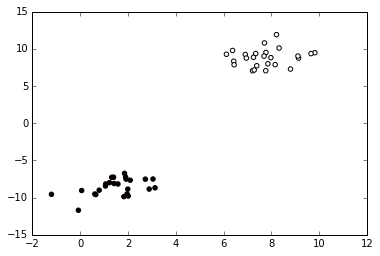

In [149]:
plt.scatter(features[:,0],features[:,1],c=labels, cmap='hot')

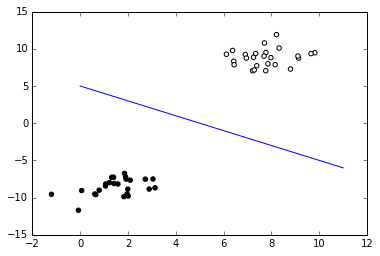

In [150]:
x = np.linspace(0,11,10)
y = -x +5
plt.scatter(features[:,0],features[:,1],c=labels, cmap='hot')
plt.plot(x,y)

(1,1) * f - 5 = 0

In [151]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

In [152]:
np.array([1,1]).dot(np.array([[2],[-10]])) - 5

array([-13])

In [153]:
g = Graph()

In [154]:
g.set_as_default()

In [155]:
x = Placeholder()

In [156]:
w = Variable([1,1])

In [157]:
b = Variable(-5)

In [158]:
z = add(matmul(w,x),b)

In [159]:
a = Sigmoid(z)

In [160]:
sess = Session()

In [161]:
sess.run(operation=a, feed_dict={x:[8,10]})

0.999997739675702

In [162]:
sess.run(operation=a, feed_dict={x:[2,-10]})

2.2603242979035746e-06